In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from numpy import mean


In [ ]:
def PlotGaussian(s,mu,sigma,flag=1):

    count, bins, ignored = plt.hist(s, 5, density=False)
    if(flag == 1):
        plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),   linewidth=2)
        plt.show()
    else:
        plt.clf()
        plt.cla()
        plt.close()
    return count

**GAUSSIAN DISTRIBUTION N(0,1)**

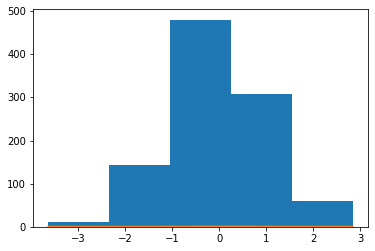

In [ ]:
size = 1000
### Gaussian DISTRIBUTION N(0,1)
mu1, sigma1 = 0, 1
s_0_01 = np.random.normal(mu1, sigma1, size) # 1000 samples from N(Mu,Sigma)
#s_0_01.sort()

g1_hist = PlotGaussian(s_0_01,mu1,sigma1,1)


**UNIFORM DISTRIBUTION U[-1,1]**

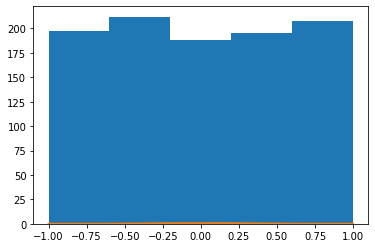

In [ ]:
s_1_1 = s = np.random.uniform(-1,1,size)
#s_1_1.sort()
g2_hist = PlotGaussian(s_1_1,0,0.1,1)

#print("Sample: ",s_1_1)

**LOSS FUNCTION**

In [ ]:
# Loss Functions

def entropy(p):
	return -(sum([p[i]*log2(p[i]) for i in range(len(p))]))

def cross_entropy(p, q):
	return -(sum([p[i]*log2(q[i]) for i in range(len(p))]))

def Kullback_Leibler(p, q):
	return cross_entropy(p, q) - entropy(p)


In [ ]:
### Computing Probabilities from real data

gau = g1_hist / np.sum(g1_hist)  # Gaussian Distribution
uni = g2_hist / np.sum(g2_hist)  # Uniform DIstribution

### Computing CrossEntropy

print("Guassian Distribution Sample:",gau)

print("Uniform Distribution Sample:",uni)

print("Vector Entropy (GAU)  = %f "%(entropy(gau))) # Gaussian Sample

print("Vector Entropy  (UNI) = %f "%(entropy(uni)))

print("CrossEntropy( N(%0.1f,%0.1f) U(%0.1f,%0.1f) ) = %f "%(mu1,sigma1,-1,1,cross_entropy(gau,uni)))

print("Kullback-Leibler Divergence = %f "%(Kullback_Leibler(gau,uni)))

Guassian Distribution Sample: [0.01  0.144 0.48  0.307 0.059]
Uniform Distribution Sample: [0.197 0.212 0.188 0.195 0.208]
Vector Entropy (GAU)  = 1.741249 
Vector Entropy  (UNI) = 2.320537 
CrossEntropy( N(0.0,1.0) U(-1.0,1.0) ) = 2.360764 
Kullback-Leibler Divergence = 0.619515 


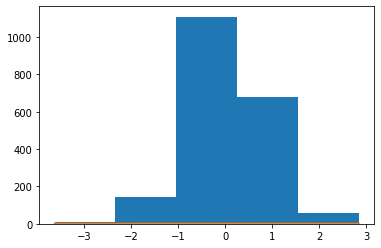

In [ ]:
#### Mix both distribution
mixed = np.concatenate((s_1_1,s_0_01) ,axis=0)
mixed_hist = PlotGaussian(mixed,mu1,sigma1,1)

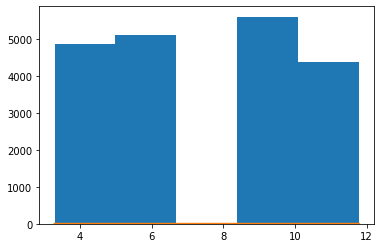


[0.023  0.2651 0.5218 0.1808 0.0093]
[0.0062 0.1585 0.5291 0.2876 0.0186]
CrossEntropy                = 1.730890 
Kullback-Leibler Divergence = 0.099383 


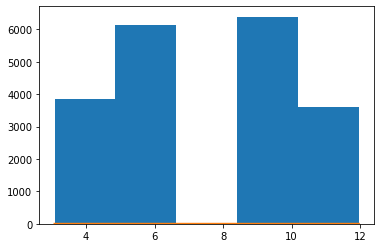


[0.0082 0.2017 0.5533 0.2241 0.0127]
[0.01   0.2082 0.5675 0.204  0.0103]
CrossEntropy                = 1.561113 
Kullback-Leibler Divergence = 0.002415 


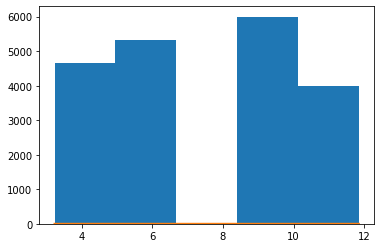


[0.0285 0.3546 0.5247 0.09   0.0022]
[0.0066 0.1709 0.5563 0.2497 0.0165]
CrossEntropy                = 1.747344 
Kullback-Leibler Divergence = 0.250393 


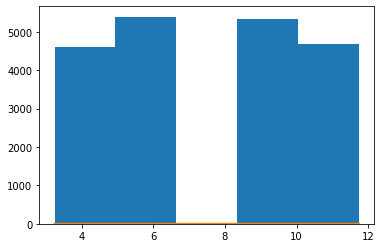


[0.0193 0.2463 0.5123 0.2089 0.0132]
[0.0108 0.1859 0.5232 0.2583 0.0218]
CrossEntropy                = 1.683545 
Kullback-Leibler Divergence = 0.027049 


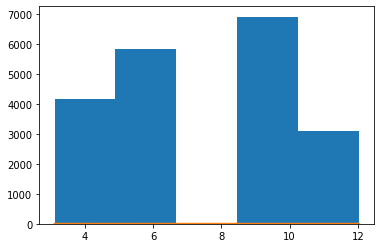


[0.0138 0.2514 0.5664 0.1632 0.0052]
[0.0339 0.3234 0.5122 0.127  0.0035]
CrossEntropy                = 1.551799 
Kullback-Leibler Divergence = 0.034975 


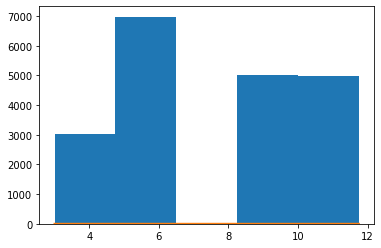


[0.007  0.1777 0.5633 0.239  0.013 ]
[0.0142 0.2047 0.519  0.2457 0.0164]
CrossEntropy                = 1.543683 
Kullback-Leibler Divergence = 0.009268 


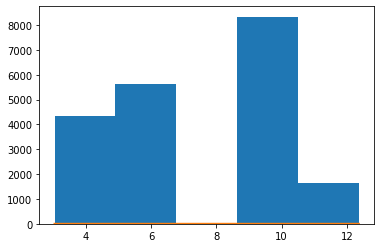


[0.0106 0.1951 0.5624 0.2197 0.0122]
[0.0106 0.2781 0.5898 0.1197 0.0018]
CrossEntropy                = 1.642202 
Kullback-Leibler Divergence = 0.087794 


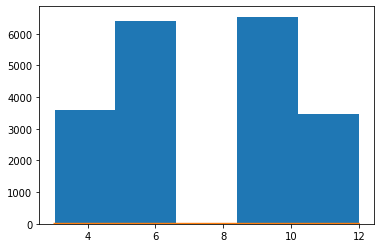


[0.01   0.2114 0.5645 0.2055 0.0086]
[0.0099 0.21   0.5772 0.195  0.0079]
CrossEntropy                = 1.534851 
Kullback-Leibler Divergence = 0.000655 


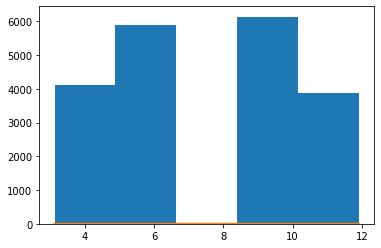


[0.0127 0.2154 0.5473 0.213  0.0116]
[0.0158 0.2341 0.5457 0.1951 0.0093]
CrossEntropy                = 1.585935 
Kullback-Leibler Divergence = 0.003112 


In [ ]:
for i in range(1,10):
    mu1, sigma1 = 5, 0.5
    mu2, sigma2 = 10, 0.5

    s_0_01 = np.random.normal(mu1, sigma1, 10000)
    #s_0_01.sort()

    s_1_1 = np.random.normal(mu2, sigma2, 10000)
    #s_1_1.sort()

    mixed = np.concatenate((s_1_1,s_0_01) ,axis=0)

    g1_hist = PlotGaussian(s_0_01,mu1,sigma1,0)
    g2_hist = PlotGaussian(s_1_1,mu2,sigma2,0)
    mixed_hist = PlotGaussian(mixed,mu1,sigma1,1)
    print()
    g1_hist = g1_hist+1e-10 # avoiding log 0
    g2_hist = g2_hist+1e-10

    g1_hist = g1_hist/np.sum(g1_hist)
    g2_hist = g2_hist/np.sum(g2_hist)

    print((g1_hist))
    print((g2_hist))
    print("CrossEntropy                = %f "%(cross_entropy(g1_hist,g2_hist)))
    print("Kullback-Leibler Divergence = %f "%(Kullback_Leibler(g1_hist,g2_hist)))